In [1]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys
import logging
# Call the function


In [2]:
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loading as dl

In [18]:
sys.path.append(os.path.abspath("../"))

# Now import your scripts
from scripts.eda import check_missing_values, check_duplicates, check_outliers, save_cleaned_data,plot_historical_prices,plot_rolling_statistics,check_stationarity,plot_price_trend_over_years,plot_with_events



#from scripts.logger import logger 

In [4]:
logger = logging.getLogger('EDA Logger')
logger.setLevel(logging.DEBUG)

In [5]:
# load the data
data = dl.load_data("BrentOilPrices.csv")

In [6]:
print("head of the BrentOilPrices ")
data.head()

head of the BrentOilPrices 


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [8]:
data.dtypes

Date      object
Price    float64
dtype: object

In [9]:
# Check for missing values
missing_values = check_missing_values(data)

INFO:EDA Logger:Missing values per column:


2025-02-20 02:06:59,347 - INFO - Missing values per column:


INFO:EDA Logger:Date     0
Price    0
dtype: int64


2025-02-20 02:06:59,349 - INFO - Date     0
Price    0
dtype: int64


In [10]:
# Check for duplicates
duplicates = check_duplicates(data)

INFO:EDA Logger:Number of duplicate rows: 0


2025-02-20 02:06:59,364 - INFO - Number of duplicate rows: 0


There are no missing values in the dataset (Date and Price both have 0 missing values).
There are no duplicate rows in the dataset.

In [11]:
outliers = check_outliers(data, column="Price")

INFO:EDA Logger:Number of outliers in 'Price': 0


2025-02-20 02:06:59,378 - INFO - Number of outliers in 'Price': 0


No Outliers Detected: The absence of outliers suggests that the Price column is consistent and doesn’t contain extreme values.

In [12]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")


C:\Users\HP\AppData\Local\Temp\ipykernel_10976\2726263390.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"])


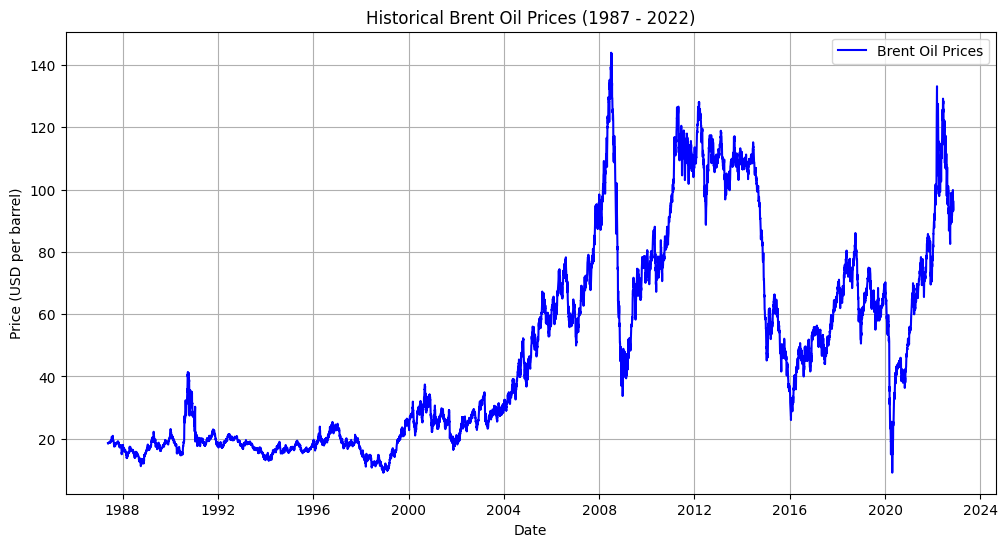

In [13]:
# Plot historical prices
plot_historical_prices(data)

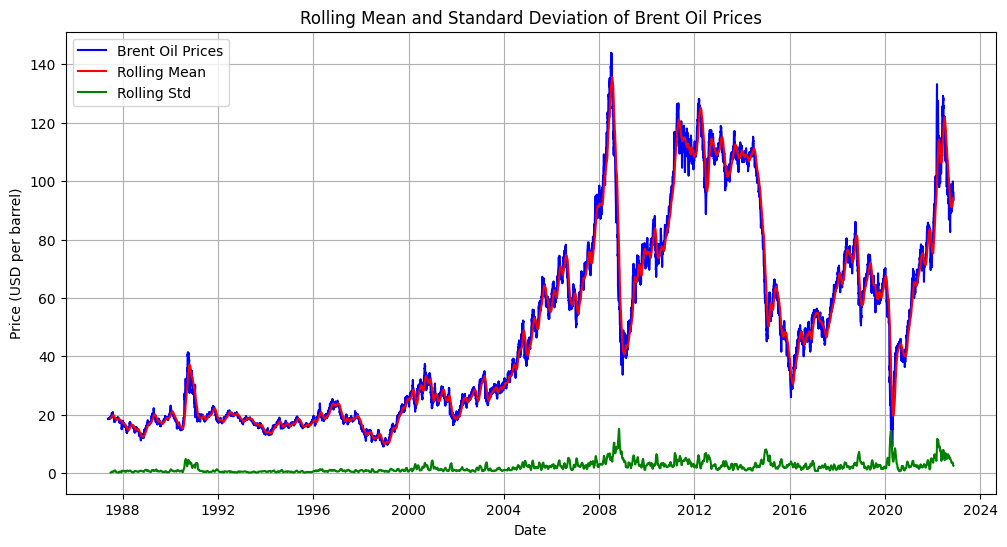

In [14]:
# Plot rolling statistics
plot_rolling_statistics(data)

In [15]:
# Check stationarity
stationarity_results = check_stationarity(data, column="Price")
print(stationarity_results)

INFO:EDA Logger:ADF Statistic: -1.9938560113924675


2025-02-20 02:07:00,810 - INFO - ADF Statistic: -1.9938560113924675


INFO:EDA Logger:p-value: 0.28927350489340287


2025-02-20 02:07:00,811 - INFO - p-value: 0.28927350489340287


INFO:EDA Logger:Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}


2025-02-20 02:07:00,812 - INFO - Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}
{'ADF Statistic': np.float64(-1.9938560113924675), 'p-value': np.float64(0.28927350489340287), 'Critical Values': {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}}


c:\Users\HP\Documents\Dagii\week 10\brent-price-change-analysis\scripts\eda.py:184: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_price = data["Price"].resample("Y").mean()


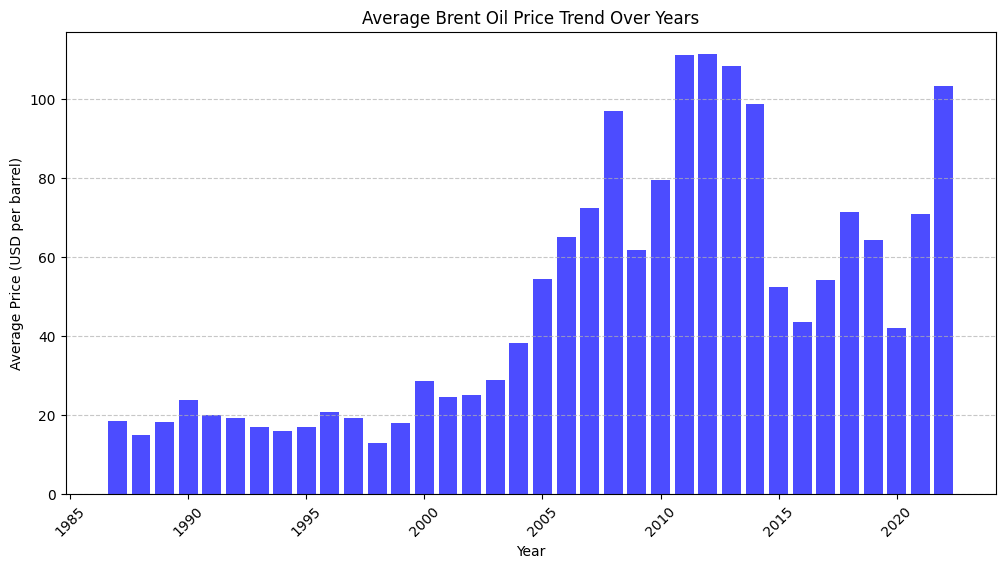

In [16]:
plot_price_trend_over_years(data)

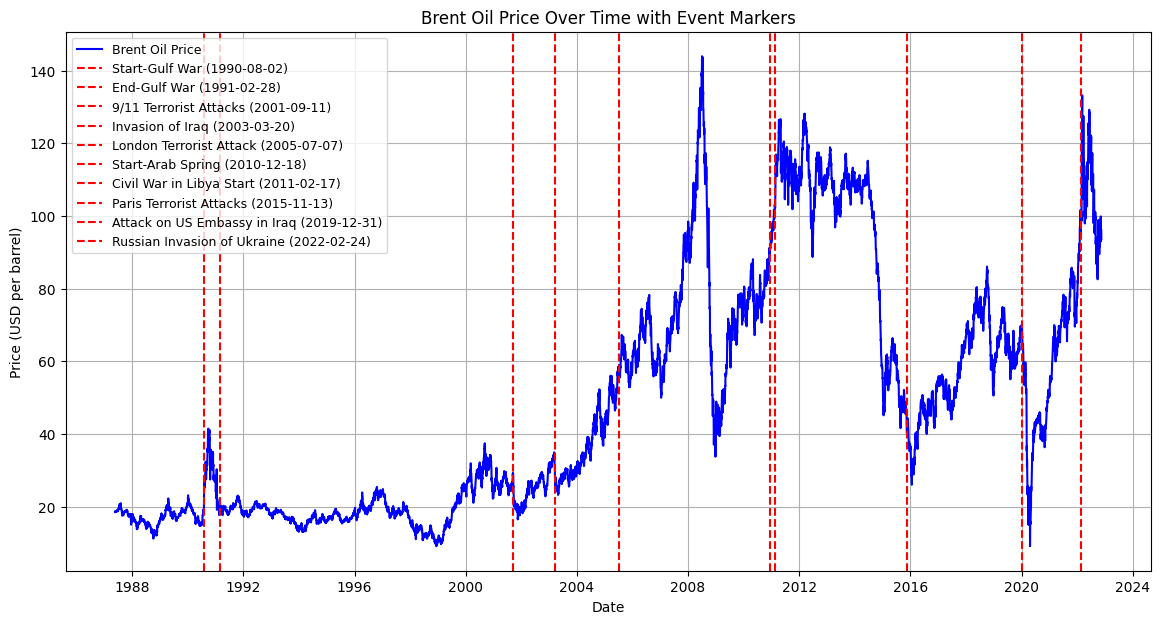

In [19]:

plot_with_events(data)
